## Titanic (test) - Machine Learning from Disaster

In [1]:
from utils import *

In [2]:
test = pd.read_csv('dataset/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
print(test.shape)
test.dtypes

(418, 11)


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
test = preprocess_data(test)
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
dtype: int64

In [6]:
# Remove 'PassengerId' (not needed for modeling)
passenger_ids = test['PassengerId']
test.drop(columns='PassengerId', inplace=True)
  

In [7]:
test.duplicated().sum()

44

In [8]:
test.drop_duplicates(inplace=True)
test.duplicated().sum()

0

In [12]:
numerical_cols = test.select_dtypes(include=['number']).columns
for col in numerical_cols:
    outliers = detect_outliers_iqr(test, col)
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Pclass: 2
Outliers in Age: 2
Outliers in Fare: 2
Outliers in FamilySize: 2
Outliers in IsAlone: 2


In [13]:
test = encode_feature(test)
test.head()

,Pclass,Sex,Age,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34,7,1,1,0,1,0
1,3,1,47,7,2,0,0,0,1
2,2,0,62,9,1,1,0,1,0
3,3,0,27,8,1,1,0,0,1
4,3,1,22,12,3,0,0,0,1


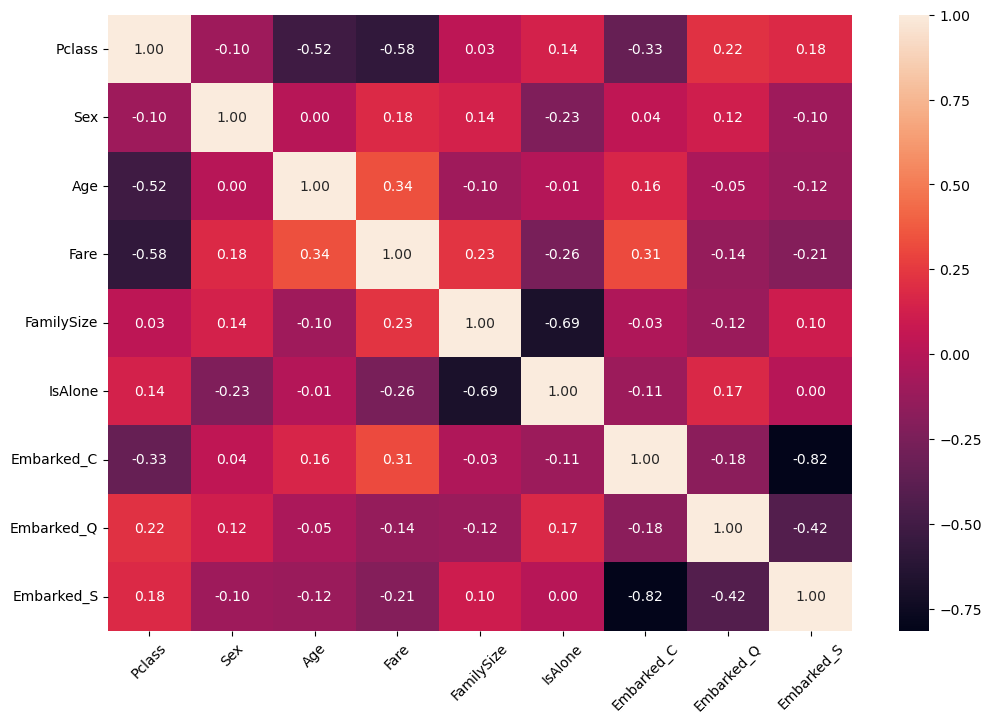

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(test.corr(), annot=True, fmt='.2f')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'PassengerId'),
  Text(1, 0, 'Pclass'),
  Text(2, 0, 'Age'),
  Text(3, 0, 'Fare'),
  Text(4, 0, 'FamilySize'),
  Text(5, 0, 'IsAlone')])

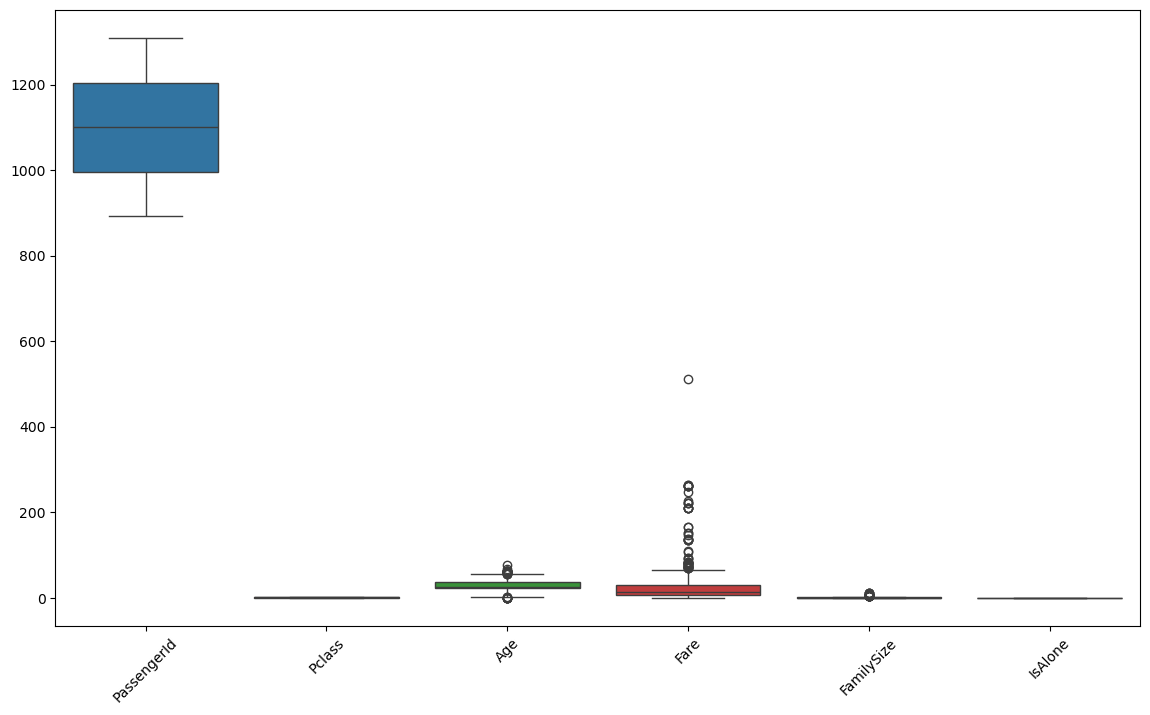

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=test)
plt.xticks(rotation=45)

In [15]:
test_scaled = test.copy()

cols_to_scale = ['Age', 'Fare', 'FamilySize']
rs = RobustScaler()
test_scaled[cols_to_scale] = rs.transform(test[cols_to_scale])

NotFittedError: This RobustScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.